In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')


In [252]:
# Importar librerías necesarias
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_excel('imdb_anime.xlsx')
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),Tanjiro heads to his next location southeast; ...,NaN,TV-14,NaN,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),Tanjiro gets separated from Zenitsu when he en...,NaN,TV-MA,NaN,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,NaN,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,"Ogie Banks,Deborah Sale Butler,John DeMita,Ric...",Not Rated,NaN,NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


```
1. Realiza un análisis de calidad de datos, revisando aspectos básicos y selecciona un
primer conjunto de variables a eliminar. Luego de ello, realiza un análisis exploratorio
inicial considerando gráficos de distribuciones de las diferentes variables, y concluye
al respecto. Si observas algo raro respecto a los tipos de variables debes proponer
algún tratamiento.

```

In [253]:

data= data.drop(['Episode Title', 'Summary','Stars','Metascore'], axis=1)
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Certificate,Gross,Episode
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),TV-14,187689,0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,PG,28895,0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,PG,189108,0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),TV-MA,434457,0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),TV-MA,82909,0
...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),TV-14,3432,1
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),TV-MA,3309,1
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),TV-14,2743,1
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),Not Rated,NaN,1


In [254]:
data = data.dropna()
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Certificate,Gross,Episode
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),TV-14,187689,0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,PG,28895,0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,PG,189108,0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),TV-MA,434457,0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),TV-MA,82909,0
...,...,...,...,...,...,...,...,...,...
45709,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.3,3456,24 min,(2019– ),TV-MA,3456,1
45710,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3401,24 min,(2019– ),TV-MA,3401,1
45711,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3375,24 min,(2019– ),TV-MA,3375,1
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),TV-14,3432,1


```
2. Transformación Inicial de Datos: las diferentes columnas que son datos de texto
deben ser transformadas a numéricas para poder explorarlas de mejor forma por
ejemplo:
a. User Rating: Extraer el número correspondiente al rating
b. Number of Votes: Convertir en número
c. Year: Extraer el año de inicio del anime
d. Otros. Aplica algún criterio para saber qué variables deben ser transformadas
en primera instancia.

```

In [255]:
# Convertir la columna 'User Rating' a números, si es posible
data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')

# Eliminar filas con valores no numéricos en la columna 'User Rating'
data.dropna(subset=['User Rating'], inplace=True)

# Calcular la media de 'User Rating' después de limpiar los datos
mean_user_rating = data['User Rating'].mean()
print(mean_user_rating)
data

7.337836974575189


,Title,Genre,User Rating,Number of Votes,Runtime,Year,Certificate,Gross,Episode
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),TV-14,187689,0
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,PG,28895,0
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,PG,189108,0
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),TV-MA,434457,0
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),TV-MA,82909,0
...,...,...,...,...,...,...,...,...,...
45709,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.3,3456,24 min,(2019– ),TV-MA,3456,1
45710,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3401,24 min,(2019– ),TV-MA,3401,1
45711,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",8.4,3375,24 min,(2019– ),TV-MA,3375,1
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),TV-14,3432,1


In [256]:
# Limpiar la columna 'Runtime' eliminando las comas y el texto "min"
data['Runtime'] = data['Runtime'].str.replace(',', '').str.replace(' min', '')

# Convertir la columna 'Runtime' a números de punto flotante
data['Runtime'] = data['Runtime'].astype(float)

# Limpiar la columna 'Year' eliminando cualquier texto adicional y convirtiendo a números
data['Year'] = data['Year'].str.extract('(\d+)').astype(float)
print(data[['Runtime', 'Year']].head(20))

    Runtime    Year
0      24.0  1999.0
1      99.0     NaN
2      92.0     NaN
3      24.0  2013.0
4      24.0  2020.0
5      24.0  2022.0
6      24.0  2019.0
7     102.0     NaN
8      24.0  2004.0
9      20.0  2015.0
10     24.0  2007.0
11    100.0     NaN
12     25.0  2021.0
14     24.0  2002.0
15     24.0  2021.0
16     24.0  2019.0
17    110.0     NaN
18     24.0  2023.0
19    125.0     NaN
20     24.0  2011.0


In [257]:
# Verificar el tipo de datos en la columna 'User Rating'
print(data['User Rating'].dtype)

# Convertir los valores a tipo string si no lo están
data['User Rating'] = data['User Rating'].astype(str)

# Aplicar str.extract para extraer el número
data['User Rating'] = data['User Rating'].str.extract('(\d+\.\d+)')

# Convertir los valores extraídos a tipo float
data['User Rating'] = data['User Rating'].astype(float)

# Verificar los cambios
print(data['User Rating'].dtype)
data['User Rating']


float64
float64


0        8.9
1        7.4
2        7.1
3        9.1
4        8.5
        ... 
45709    8.3
45710    8.4
45711    8.4
45712    7.3
45713    7.9
Name: User Rating, Length: 15654, dtype: float64

In [258]:
data['Number of Votes'] = pd.to_numeric(data['Number of Votes'], errors='coerce')
data['Number of Votes']

0        187689
1         28895
2        189108
3        434457
4         82909
          ...  
45709      3456
45710      3401
45711      3375
45712      3432
45713      3309
Name: Number of Votes, Length: 15654, dtype: int64

In [259]:
data['Year'] 


0        1999.0
1           NaN
2           NaN
3        2013.0
4        2020.0
          ...  
45709    2019.0
45710    2019.0
45711    2019.0
45712    2019.0
45713    2019.0
Name: Year, Length: 15654, dtype: float64

```
3. Revisión de outliers: ahora que tienes variables numéricas revisa la distribución y
utiliza algún método para encontrar outliers, por ejemplo IQR o Z-score.
```

In [260]:
def detect_outliers_iqr(df, features):
    outliers = {}
    for feature in features:
        q1 = np.percentile(df[feature].dropna(), 25)
        q3 = np.percentile(df[feature].dropna(), 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()
    return outliers

def detect_outliers_zscore(df, features, threshold=3):
    outliers = {}
    for feature in features:
        z_scores = (df[feature] - df[feature].mean()) / df[feature].std()
        outliers[feature] = df[np.abs(z_scores) > threshold].index.tolist()
    return outliers

# Seleccionar las variables numéricas para revisar outliers
numeric_features = ['User Rating', 'Number of Votes', 'Gross']

# Detectar outliers utilizando el método del rango intercuartílico (IQR)
outliers_iqr = detect_outliers_iqr(data, numeric_features)
print("Outliers detectados con el método del rango intercuartílico (IQR):")
print(outliers_iqr)

# Detectar outliers utilizando el método Z-score
outliers_zscore = detect_outliers_zscore(data, numeric_features)
print("\nOutliers detectados con el método Z-score:")
print(outliers_zscore)
def remove_outliers(df, outliers):
    for feature in outliers:
        outlier_indices = set(outliers[feature])
        df_indices = set(df.index)
        common_indices = outlier_indices.intersection(df_indices)
        df = df.drop(common_indices)
    return df


# Eliminar outliers detectados con el método del rango intercuartílico (IQR)
data = remove_outliers(data, outliers_iqr)

# Eliminar outliers detectados con el método Z-score
data = remove_outliers(data, outliers_zscore)

Outliers detectados con el método del rango intercuartílico (IQR):
{'User Rating': [252, 405, 414, 483, 587, 590, 648, 809, 813, 1093, 1246, 1255, 1321, 1425, 1428, 1485, 1647, 1651, 1831, 1973, 2154, 2184, 2356, 2409, 2440, 2880, 2908, 3038, 3057, 3066, 3088, 3100, 3145, 3229, 3233, 3345, 3357, 3396, 3477, 3500, 3524, 3581, 3659, 3667, 3802, 3818, 3870, 3913, 4074, 4087, 4172, 4206, 4287, 4310, 4435, 4439, 4484, 4603, 4658, 4734, 4749, 4789, 4835, 4855, 5067, 5113, 5177, 5184, 5252, 5333, 5386, 5388, 5416, 5656, 5680, 5821, 5835, 5855, 5909, 5917, 5947, 5977, 6037, 6040, 6041, 6145, 6254, 6432, 6553, 6579, 7409, 10707, 10805, 10834, 12379, 12384, 12451, 12452, 12456, 12458, 12460, 12502, 12571, 12613, 12614, 12616, 12617, 12618, 12619, 12757, 13008, 13009, 13010, 13011, 13012, 13284, 13297, 13321, 13469, 13484, 13620, 13624, 13635, 13636, 13656, 13685, 13749, 13750, 13751, 13800, 13801, 13812, 13813, 13827, 13828, 13829, 13830, 13831, 13832, 13833, 13834, 13835, 13836, 13837, 13838, 1

In [261]:
data

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Certificate,Gross,Episode
129,Mech Cadets,"Animation, Action, Adventure",6.8,497,25.0,2023.0,TV-Y7,497,0
196,Rurouni Kenshin,"Animation, Action, Adventure",8.3,529,24.0,2023.0,TV-MA,529,0
215,Ooku: The Inner Chambers,"Animation, Drama, Fantasy",7.5,628,30.0,2023.0,TV-MA,628,0
222,Nier: Automata Ver1.1a,"Animation, Action, Adventure",7.3,1205,23.0,2023.0,TV-14,1205,0
228,Pokémon Horizons,"Animation, Action, Adventure",8.1,279,24.0,2023.0,TV-Y7,279,0
...,...,...,...,...,...,...,...,...,...
45681,A Certain Magical Index,"Animation, Action, Comedy",6.8,28,24.0,2008.0,TV-14,28,1
45688,JoJo's Bizarre Adventure,"Animation, Action, Adventure",7.7,798,25.0,2012.0,TV-MA,798,1
45692,RobiHachi,"Animation, Comedy, Sci-Fi",6.2,14,24.0,NaN,TV-14,14,1
45693,Juuni Taisen,"Animation, Action, Fantasy",6.7,25,23.0,NaN,TV-MA,25,1


```
4. Transformación de variables finales: realiza un pequeño análisis de distribuciones y
transforma las variables aplicando transformaciones como logaritmo o
get_dummies para extraer las diferentes categorías. Genera una estrategia para lidiar
con los valores nulos y crea las variables que te parezcan necesarias.
```

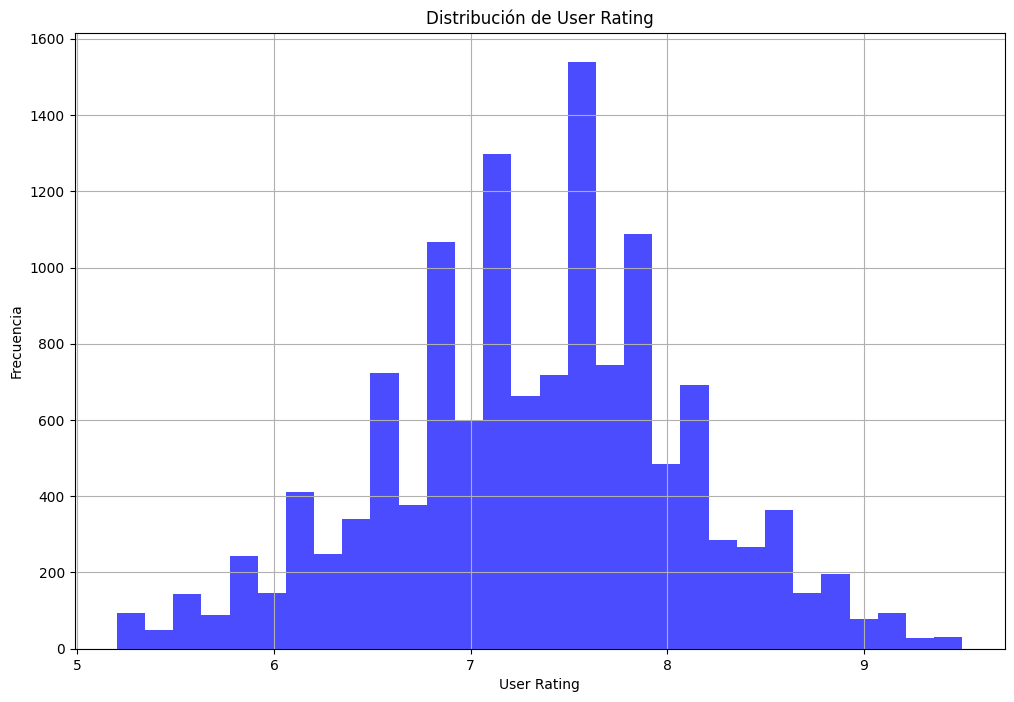

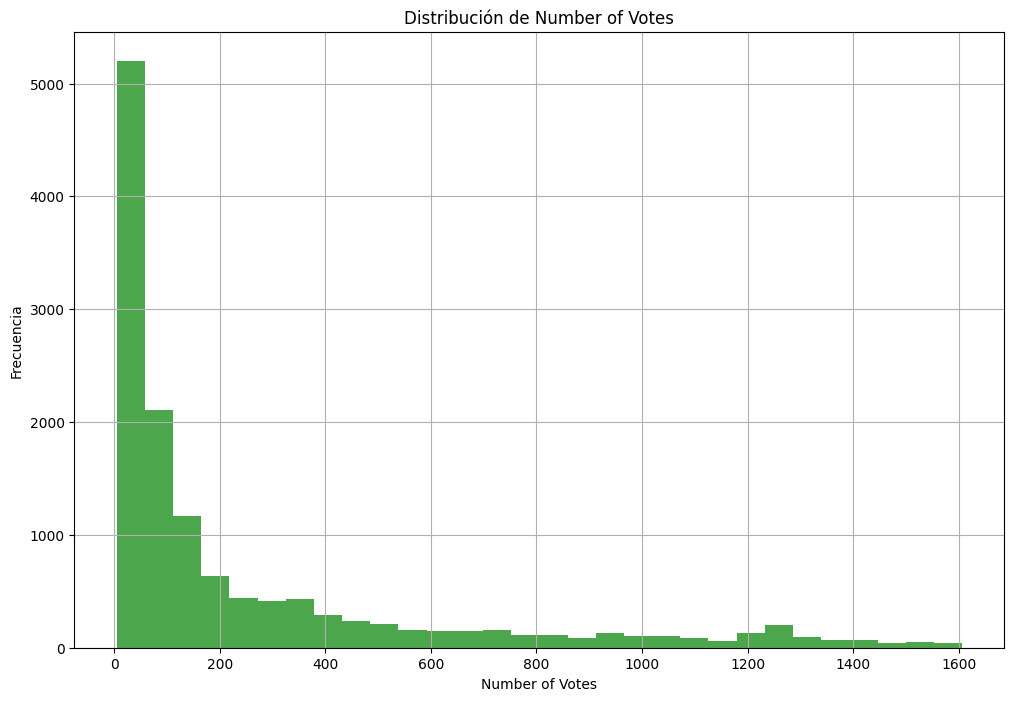

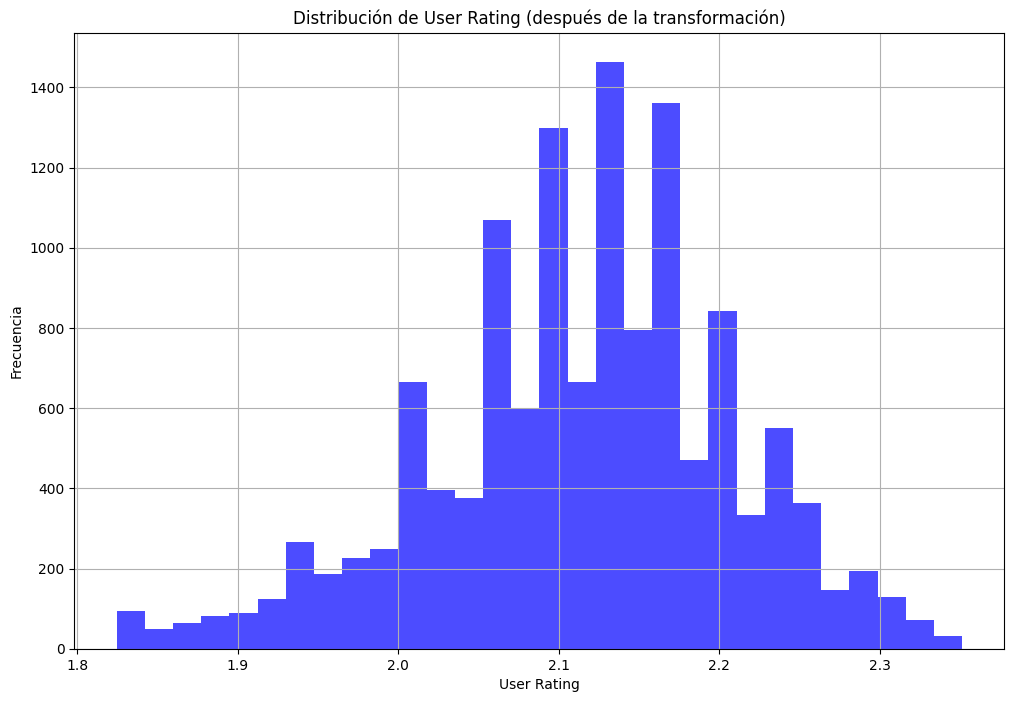

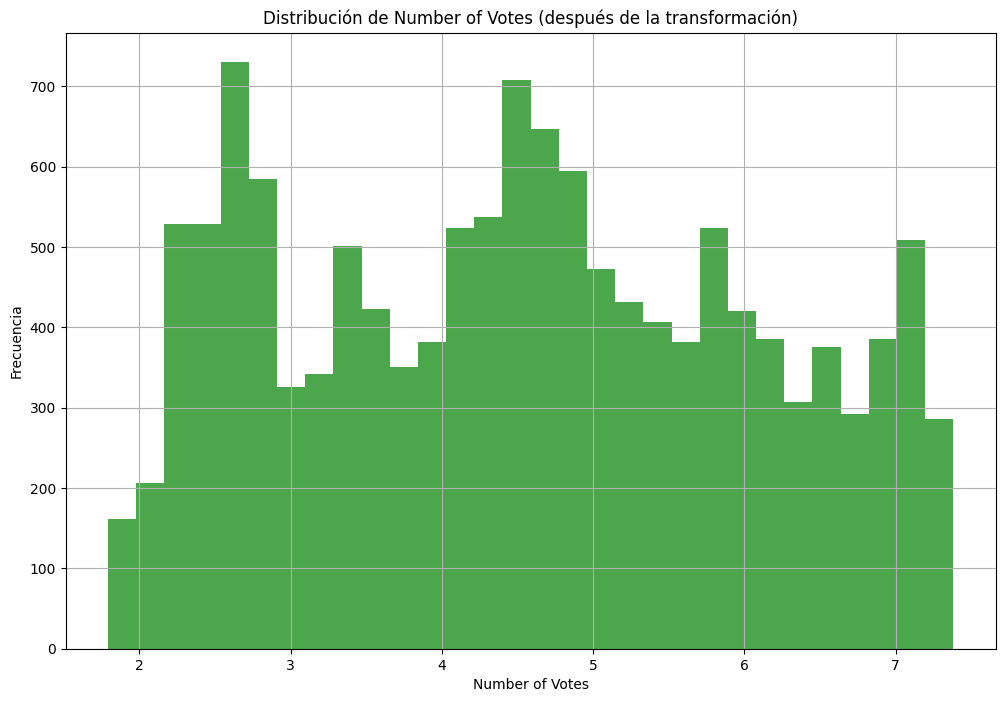

In [262]:
# Visualización de distribuciones con histogramas
plt.figure(figsize=(12, 8))
plt.hist(data['User Rating'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribución de User Rating')
plt.xlabel('User Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.hist(data['Number of Votes'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Distribución de Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Transformación de variables numéricas
data['User Rating'] = np.log1p(data['User Rating'])
data['Number of Votes'] = np.log1p(data['Number of Votes'])

# Visualización de distribuciones después de la transformación
plt.figure(figsize=(12, 8))
plt.hist(data['User Rating'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribución de User Rating (después de la transformación)')
plt.xlabel('User Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.hist(data['Number of Votes'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Distribución de Number of Votes (después de la transformación)')
plt.xlabel('Number of Votes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()




In [263]:
numeric_features = ['User Rating', 'Number of Votes']
categorical_features = ['Certificate']
# Convertir variables categóricas a tipo de cadena de caracteres si es necesario
data['Certificate'] = data['Certificate'].astype(str)

# Definir los pasos del pipeline para el tratamiento de valores nulos y la transformación de variables
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
    ('scaler', StandardScaler())  # Estandarizar las variables numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos con la moda
    ('onehot', OneHotEncoder())  # Codificar variables categóricas
])

# Combinar los pasos de preprocesamiento utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar las transformaciones definidas en el preprocesador
transformed_data = preprocessor.fit_transform(data)
transformed_data

<13250x32 sparse matrix of type '<class 'numpy.float64'>'
	with 39750 stored elements in Compressed Sparse Row format>

```
5. Análisis de Correlaciones: genera un análisis de correlaciones de las variables. No es
necesario que apliques todos los métodos vistos en clases, basta que argumentes
bien cuál utilizarás y por qué, y si necesitas algo más. La idea es generar gráficos
para entender la relación entre las diferentes variables, poniendo foco en la variable
objetivo.

``` 

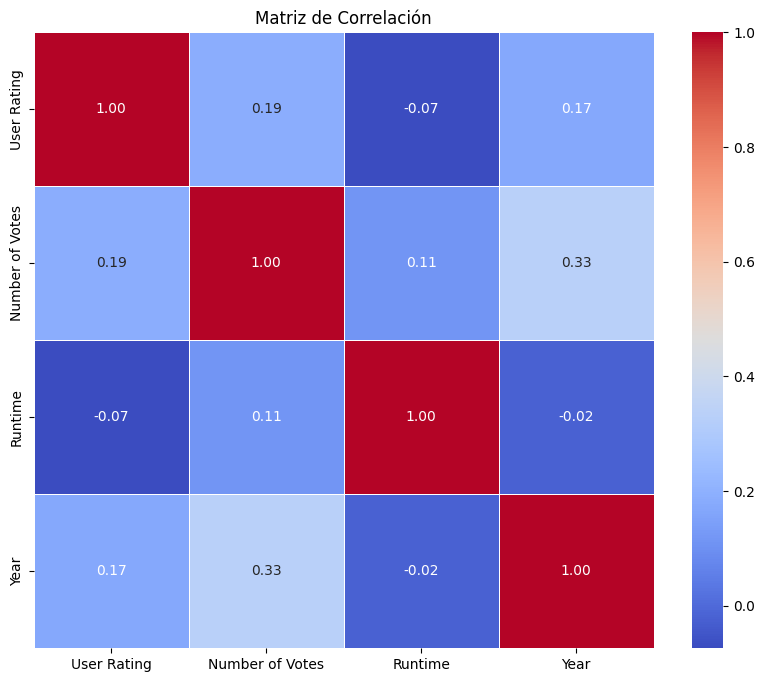

In [264]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



Una correlación de 0.33 entre el número de votos (Number of Votes) y el año (Year) sugiere una relación positiva moderada entre estas dos variables. Esto podría interpretarse como que a lo largo de los años, las películas o programas de televisión han recibido más votos en general. Sin embargo, esta correlación no es muy alta, lo que indica que hay otros factores que también influyen en la cantidad de votos.

Por otro lado, una correlación de 0.19 entre el número de votos (Number of Votes) y el rating de usuario (User Rating) sugiere una relación positiva más débil entre estas dos variables. Esto significa que, en general, las películas o programas de televisión con un rating de usuario más alto tienden a recibir más votos, pero la relación no es tan fuerte como la observada entre el número de votos y el año.


```
6. Genera una función que resuma todo el procesamiento necesario para el dataset,
que lea el dataset original y entregue un dataset ya tratado, con las columnas
transformadas y creadas.
```

['24 min' '99 min' '92 min' '102 min' '20 min' '100 min' '25 min'
 '124 min' '110 min' '125 min' '91 min' '23 min' '119 min' '81 min'
 '108 min' '115 min' '95 min' '45 min' '105 min' '106 min' '96 min'
 '87 min' '93 min' '98 min' '83 min' '84 min' '89 min' '90 min' '97 min'
 '103 min' '134 min' '88 min' '122 min' '118 min' '101 min' '85 min'
 '86 min' '78 min' '104 min' '112 min' '130 min' '126 min' '325 min'
 '117 min' '264 min' '22 min' '82 min' '75 min' '77 min' '30 min' '94 min'
 '316 min' '121 min' '111 min' '63 min' '51 min' '50 min' '10 min'
 '137 min' '79 min' '46 min' '113 min' '154 min' '80 min' '109 min'
 '69 min' '26 min' '151 min' '76 min' '116 min' '165 min' '21 min'
 '47 min' '12 min' '300 min' '71 min' '120 min' '140 min' '68 min'
 '360 min' '16 min' '73 min' '107 min' '15 min' '114 min' '4 min'
 '129 min' '384 min' '40 min' '54 min' '132 min' '72 min' '27 min'
 '74 min' '29 min' '253 min' '53 min' '135 min' '8 min' '48 min' '128 min'
 '275 min' '55 min' '52 min' '138 m

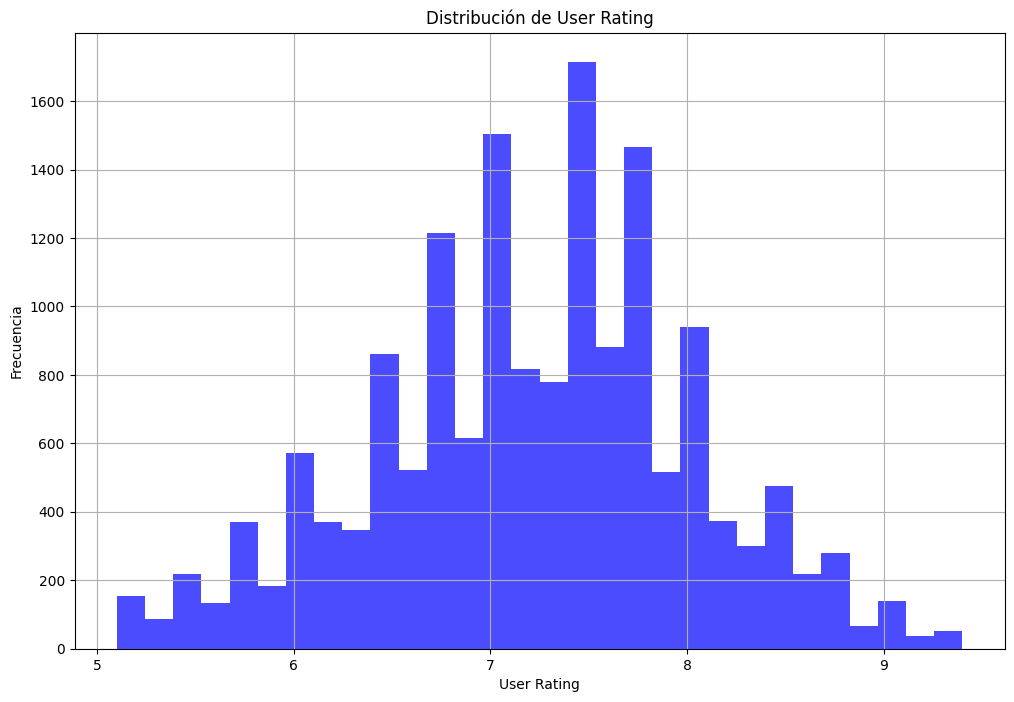

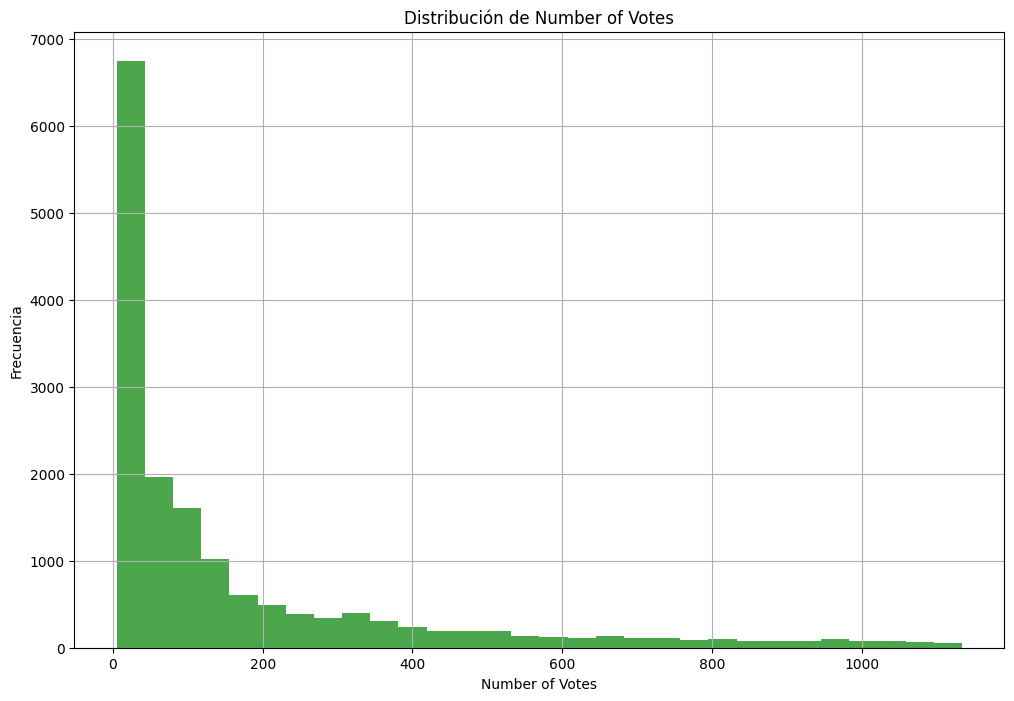

[829 497 529 ... 815 577 1093]
Columnas categóricas: Index(['Title', 'Genre', 'Certificate', 'Gross', 'Episode'], dtype='object')
Columnas numéricas: Index(['User Rating', 'Number of Votes', 'Runtime', 'Year'], dtype='object')


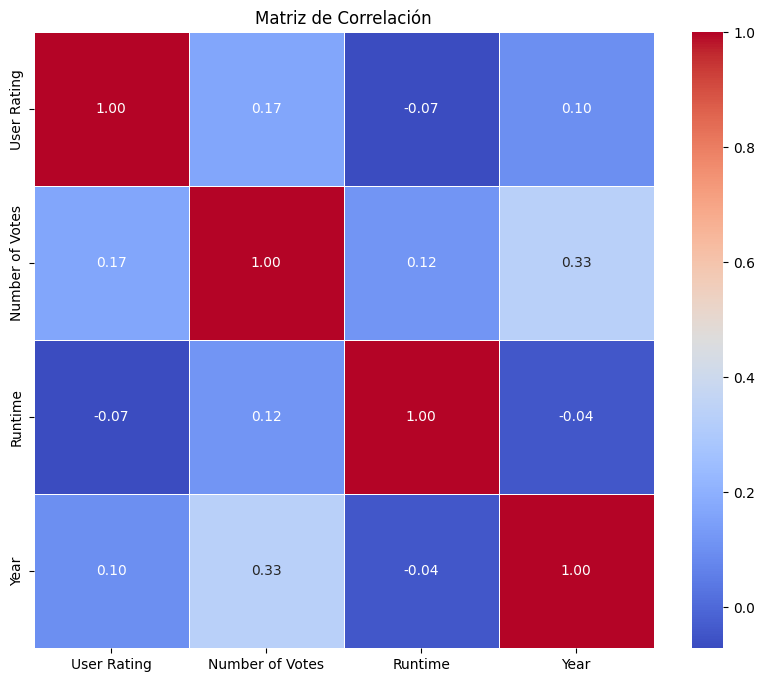

In [272]:
def preprocess_dataset(file_path):
    # Cargar el conjunto de datos
    data = pd.read_excel(file_path)
    
    # Eliminar columnas no deseadas
    data = data.drop(['Episode Title', 'Summary','Stars','Metascore'], axis=1)
    
    # Eliminar filas con valores nulos en las columnas de interés
    data = data.dropna(subset=['User Rating', 'Runtime', 'Year', 'Number of Votes'])
    
    # Convertir 'User Rating' a números
    data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')
    data['User Rating'] = data['User Rating'].astype(str).str.extract('(\d+\.\d+)')
    data['User Rating'] = data['User Rating'].astype(float)
    
    # Limpiar 'Runtime' y 'Year' y convertir a números
    # Verificar los valores únicos en la columna 'Runtime'
    print(data['Runtime'].unique())

    # Identificar y eliminar filas que contienen el valor 'Runtime'
    data = data[data['Runtime'] != 'Runtime']

    # Convertir la columna 'Runtime' a tipo float después de limpiar los datos
    data['Runtime'] = data['Runtime'].str.replace(',', '').str.replace(' min', '').astype(float)

    data['Year'] = data['Year'].str.extract('(\d+)').astype(float)
    
    # Detectar y eliminar outliers utilizando IQR y Z-score
    numeric_features = ['User Rating', 'Number of Votes', 'Gross']
    outliers_iqr = detect_outliers_iqr(data, numeric_features)
    outliers_zscore = detect_outliers_zscore(data, numeric_features)
    data = remove_outliers(data, outliers_iqr)
    data = remove_outliers(data, outliers_zscore)
    
    # Visualización de distribuciones con histogramas
    plt.figure(figsize=(12, 8))
    plt.hist(data['User Rating'].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title('Distribución de User Rating')
    plt.xlabel('User Rating')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.hist(data['Number of Votes'].dropna(), bins=30, color='green', alpha=0.7)
    plt.title('Distribución de Number of Votes')
    plt.xlabel('Number of Votes')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
    
    # Transformación de variables numéricas
    data['User Rating'] = np.log1p(data['User Rating'])
    # Verificar los valores únicos en la columna 'Number of Votes'
    print(data['Number of Votes'].unique())

    # Identificar y eliminar filas que contienen valores no numéricos
    data = data[pd.to_numeric(data['Number of Votes'], errors='coerce').notnull()]

    # Convertir la columna 'Number of Votes' a tipo float después de limpiar los datos
    data['Number of Votes'] = data['Number of Votes'].astype(float)

    # Aplicar la transformación logarítmica después de asegurarse de que todos los valores sean numéricos
    data['Number of Votes'] = np.log1p(data['Number of Votes'])

    
    # Seleccionar variables numéricas y categóricas
    numeric_features = ['User Rating', 'Number of Votes']
    categorical_features = ['Certificate']
    
    # Convertir todas las columnas categóricas a tipo de datos de cadena de caracteres
    data[categorical_features] = data[categorical_features].astype(str)

    # Definir los pasos del pipeline para el tratamiento de valores nulos y la transformación de variables
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos con la media
        ('scaler', StandardScaler())  # Estandarizar las variables numéricas
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos con la moda
        ('onehot', OneHotEncoder())  # Codificar variables categóricas como variables dummy
    ])

    # Combinar los pasos de preprocesamiento utilizando ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Aplicar las transformaciones definidas en el preprocesador
    transformed_data = preprocessor.fit_transform(data)
    
    # Visualización de la matriz de correlación
    # Identificar columnas categóricas
    categorical_columns = data.select_dtypes(include=['object']).columns
    print("Columnas categóricas:", categorical_columns)


     # Seleccionar solo las columnas numéricas
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])
    print("Columnas numéricas:", numeric_columns.columns)

    # Calcular la matriz de correlación
    correlation_matrix = numeric_columns.corr()


    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriz de Correlación')
    plt.show()
    
    return transformed_data

# Ejemplo de uso de la función
processed_data = preprocess_dataset('imdb_anime.xlsx')

```
7. A partir de las columnas que obtuviste realiza una selección de variables según los
siguientes métodos:
a. Filtros basados en correlaciones
b. Forward Selection.
Compara ambos métodos y responde si coincide lo resultante con lo obtenido en el
análisis exploratorio.
```

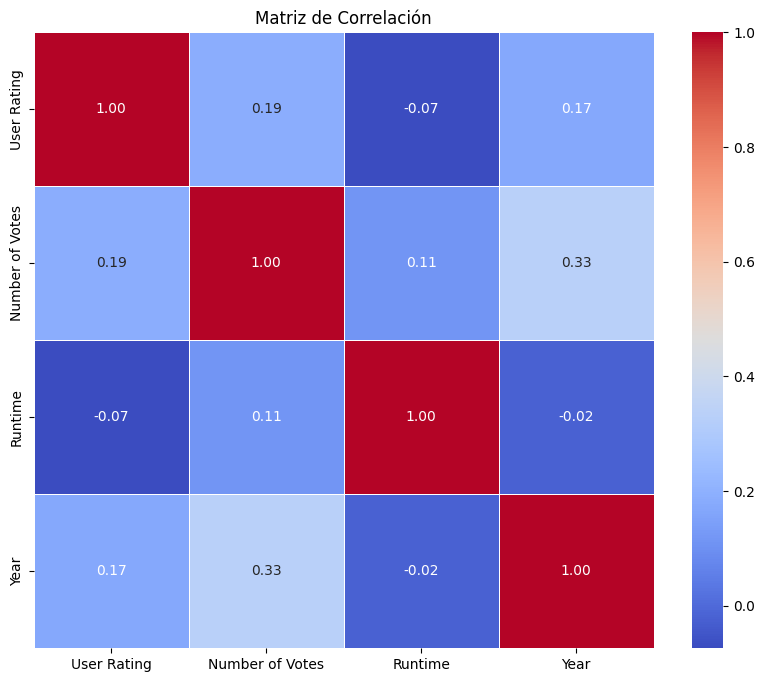

In [266]:
# Seleccionar las variables numéricas relevantes
numeric_features = ['User Rating', 'Number of Votes', 'Runtime', 'Year']

# Calcular la matriz de correlación
correlation_matrix = data[numeric_features].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [270]:
data.dropna(inplace=True)


In [271]:
def forward_selection(data, target):
    selected_features = []
    remaining_features = data.columns.tolist()
    remaining_features.remove(target)
    
    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            model_features = selected_features + [feature]
            X = sm.add_constant(data[model_features])
            y = data[target]
            model = sm.OLS(y, X).fit()
            
            if model.pvalues[feature] < best_pvalue:
                best_pvalue = model.pvalues[feature]
                best_feature = feature
        
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    return selected_features

# Aplicar Forward Selection a las variables numéricas
selected_features = forward_selection(data[numeric_features], 'User Rating')
print("Variables seleccionadas por Forward Selection:", selected_features)

Variables seleccionadas por Forward Selection: ['Number of Votes', 'Year', 'Runtime']
